# Softmax Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.activations import softmax
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from sklearn.datasets import make_blobs

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [16]:
tf.autograph.set_verbosity(0)
# plt.style.use("bmh")

### The softmax function can be written as 
$$a_{j} = \frac{e^{z_{j}}}{\sum_{k = 1}^{N} e^{z_{k}}}$$

The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}

where $\mathbf{z} = \mathbf{w}\mathbf{x} + b$

## Implement the softmax function using numpy which takes the z as an argument

In [3]:
def my_softmax(z):
    expo = np.exp(z)
    a_out = expo / np.sum(expo)
    return a_out

### Plot a graph which will show the changes taking place inbetween a softmax function with changing z

In [21]:
plt.style.use("fivethirtyeight")

In [28]:
from matplotlib.widgets import Slider
%matplotlib widget

In [34]:
def plot_softmax(func):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
    plt.subplots_adjust(bottom=0.35)

    axz0 = fig.add_axes([0.15, 0.10, 0.30, 0.03])  #left bottom width height
    axz1 = fig.add_axes([0.15, 0.15, 0.30, 0.03])
    axz2 = fig.add_axes([0.15, 0.20, 0.30, 0.03])
    axz3 = fig.add_axes([0.15, 0.25, 0.30, 0.03])

    z0 = Slider(axz0, 'z0', 0.1, 10.0, valinit=4, valstep=0.1)
    z1 = Slider(axz1, 'z1', 0.1, 10.0, valinit=3, valstep=0.1)
    z2 = Slider(axz2, 'z2', 0.1, 10.0, valinit=2, valstep=0.1)
    z3 = Slider(axz3, 'z3', 0.1, 10.0, valinit=1, valstep=0.1)

    z = np.array(["z0", 'z1', 'z2', 'z3'])    
    bar = ax[0].barh(z, height=0.6, width=[z0.val, z1.val, z2.val, z3.val], left=None, align="center")
    bars = bar.get_children()
    ax[0].set_xlim([0, 10])
    ax[0].set_title("Values of z")

    a = func(np.array([z0.val, z1.val, z2.val, z3.val]))
    anames = np.array(["a0", 'a1', 'a2', 'a3'])    
    sbar = ax[1].barh(anames, height=0.6, width=a, left=None, align="center", color="darkred")
    sbars = sbar.get_children()
    ax[1].set_xlim([0, 1])
    ax[1].set_title("Values of a for corresponding z")

    def update(val):
        bars[0].set_width(z0.val)
        bars[1].set_width(z1.val)
        bars[2].set_width(z2.val)
        bars[3].set_width(z3.val)
        a = func(np.array([z0.val, z1.val, z2.val, z3.val]))
        sbars[0].set_width(a[0])
        sbars[1].set_width(a[1])
        sbars[2].set_width(a[2])
        sbars[3].set_width(a[3])

        fig.canvas.draw_idle()

    z0.on_changed(update)
    z1.on_changed(update)
    z2.on_changed(update)
    z3.on_changed(update)

    plt.show()

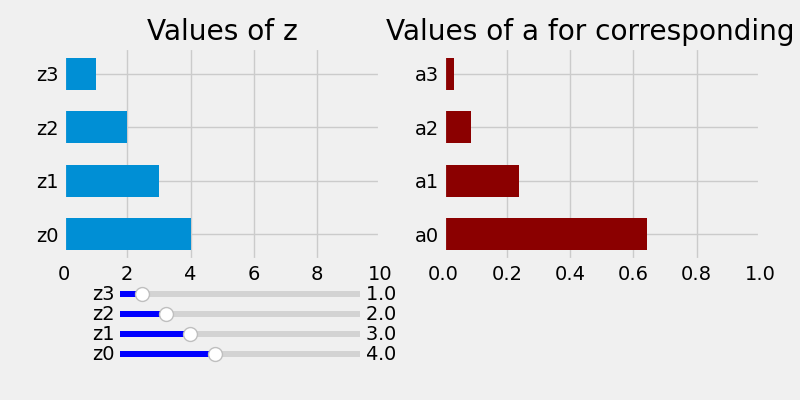

In [35]:
plot_softmax(my_softmax)

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


In [36]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

## The Obvious Organaizatio

In [37]:
model = Sequential(
    [
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=4, activation='softmax'),
    ]
)


In [38]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.2681
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0190


In [39]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[6.5815825e-06 8.7892222e-05 9.9964154e-01 2.6405451e-04]
 [9.9999988e-01 1.1575097e-07 1.0940431e-11 4.2107295e-10]]
largest value 1.0 smallest value 1.08156285e-23


### The method we implemented above is not preferred
### The optimal method for doing the same would be

In [41]:
pref = Sequential(
    [
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=4, activation='linear'),
    ]
)

pref.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

pref.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.2236
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.5320
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2281
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1208
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0845
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0675
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0400


In [43]:
pref = pref.predict(X_train)
print(f"two example output vectors:\n {pref[:2]}")
print("largest value", np.max(pref), "smallest value", np.min(pref))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-4.174164   -2.7610426   2.5108614  -1.4828409 ]
 [ 5.6551676   0.51479286 -1.6171325  -5.96745   ]]
largest value 12.97574 smallest value -15.257114


### Rembeber that above model Don't predicts probability, to get the probablity we have to use

In [44]:
sm_preferred = tf.nn.softmax(pref).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.2192287e-03 5.0095175e-03 9.7578627e-01 1.7985053e-02]
 [9.9348372e-01 5.8173402e-03 6.8998698e-04 8.9027053e-06]]
largest value 0.99999845 smallest value 5.4780366e-13


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [48]:
print("By Using non Preffered model")
for i in range(4):
    print(f"model: {p_nonpreferred[i]}, catagroy: {np.argmax(p_nonpreferred[i])}")

print("By Using Preffered model")
for i in range(4):
    print(f"sm_preferred: {sm_preferred[i]}, catagroy: {np.argmax(sm_preferred[i])}")

By Using non Preffered model
model: [6.5815825e-06 8.7892222e-05 9.9964154e-01 2.6405451e-04], catagroy: 2
model: [9.9999988e-01 1.1575097e-07 1.0940431e-11 4.2107295e-10], catagroy: 0
model: [9.9990928e-01 9.0568217e-05 2.0811653e-08 1.5774565e-07], catagroy: 0
model: [5.3346594e-05 9.9843234e-01 1.4790066e-03 3.5381949e-05], catagroy: 1
By Using Preffered model
sm_preferred: [0.00121923 0.00500952 0.97578627 0.01798505], catagroy: 2
sm_preferred: [9.934837e-01 5.817340e-03 6.899870e-04 8.902705e-06], catagroy: 0
sm_preferred: [9.5598435e-01 3.8715117e-02 5.1557026e-03 1.4488428e-04], catagroy: 0
sm_preferred: [0.00137839 0.99085426 0.00554952 0.00221783], catagroy: 1
